In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install Ultralytics library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 8.4 MB/s eta 0:00:00


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [10]:
# Load the pre-trained YOLOv8 nano segmentation model
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 124MB/s]


In [5]:
# Define the dataset_path
dataset_path = '/content/drive/MyDrive/archive/Pothole_Segmentation_YOLOv8'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, '/content/drive/MyDrive/archive/Pothole_Segmentation_YOLOv8/data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Pothole
nc: 1
roboflow:
  license: CC BY 4.0
  project: pothole_segmentation_yolov8
  url: https://universe.roboflow.com/farzad/pothole_segmentation_yolov8/dataset/1
  version: 1
  workspace: farzad
train: ../train/images
val: ../valid/images



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 720
Number of validation images: 60
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


['pic-10-_jpg.rf.5a901c212d899a7dc7dc78be7de892c0.jpg', 'pic-1-_jpg.rf.e238c9bf3fe82e8ac55b0014a27fc529.jpg', 'pic-102-_jpg.rf.cd0b0b3a64e3a11005884c98c1f6c3aa.jpg', 'pic-103-_jpg.rf.26017e20e92320bcde575710389353b1.jpg', 'pic-101-_jpg.rf.1e32a49f89a38974ded11bba8dd3e56b.jpg', 'pic-102-_jpg.rf.bb6db5bdb59d1a6af15b0a0b565a3cdb.jpg', 'pic-101-_jpg.rf.8380b58f6540ec91db66934b342f7f9e.jpg', 'pic-1-_jpg.rf.49882cdb272111f43a6656b1494a4918.jpg', 'pic-1-_jpg.rf.8d95dd1d29760a2634a45cc7fdd84b31.jpg', 'pic-100-_jpg.rf.8c9076ee84698f90f04765f4e794a819.jpg', 'pic-100-_jpg.rf.ebc3af260e989e6f9e1e9221b9dff6b0.jpg', 'pic-102-_jpg.rf.df35bf045672f19a05f84a8c365dab3a.jpg', 'pic-10-_jpg.rf.1d433d21e11d000b6b498eacb88fe4a9.jpg', 'pic-101-_jpg.rf.4abe48a3d2a5e556908bf4286446e5ce.jpg', 'pic-100-_jpg.rf.17047bb032a49c96643c5f2108bb99dd.jpg', 'pic-10-_jpg.rf.500c683a687e403f4cdade4826a84b5b.jpg', 'pic-115-_jpg.rf.2ac2c551c23ad08dd5599f320c8dd310.jpg', 'pic-115-_jpg.rf.a808c9e7b2121bd93dbc59332a6d12cb.jpg', 

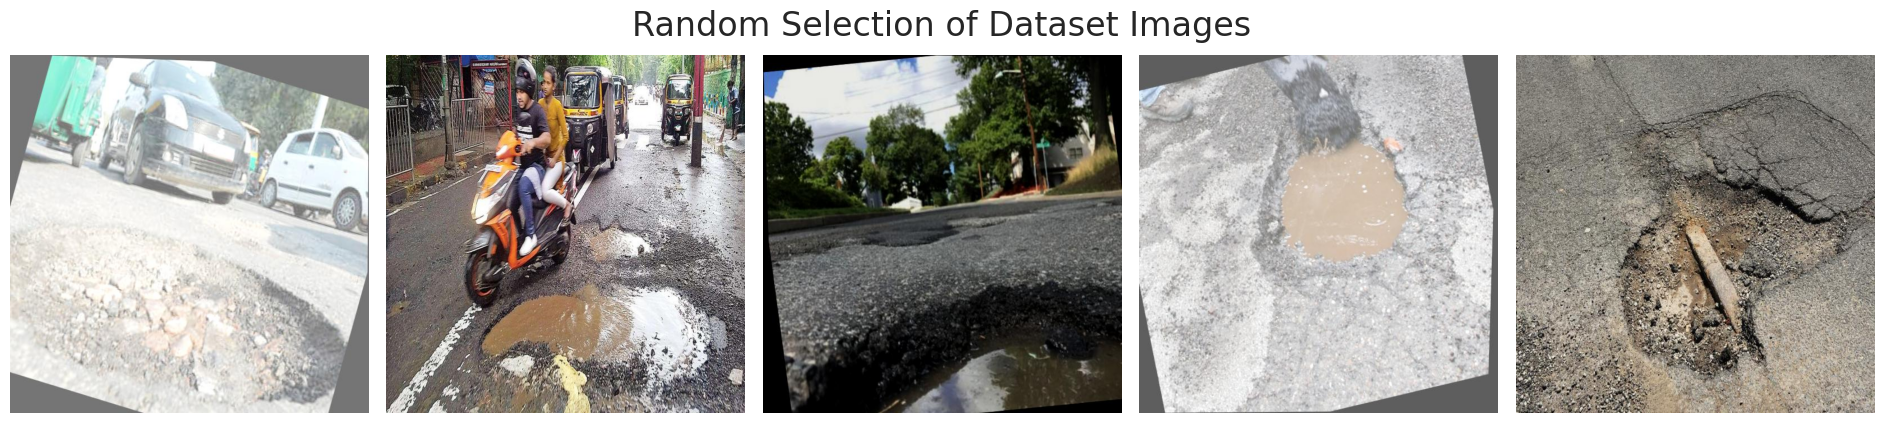

In [7]:
#  Set the seed for the random number generator
random.seed(0)

# Create a list of image files
image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

print(image_files)

# Randomly select 15 images
random_images = random.sample(image_files, 5)

print(random_images)

# Create a new figure
plt.figure(figsize=(19, 12))

# Loop through each image and display it in a 3x5 grid
for i, image_file in enumerate(random_images):
    image_path = os.path.join(train_images_path, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

# Add a suptitle
plt.suptitle('Random Selection of Dataset Images', fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

# Deleting unnecessary variable to free up memory
del image_files





In [11]:
results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=74,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    patience=15,             # Epochs to wait for no observable improvement for early stopping of training
    batch=16,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate
    lrf=0.01,                # Final learning rate (lr0 * lrf)
    dropout=0.25,            # Use dropout regularization
    device=0,                # Device to run on, i.e. cuda device=0
    seed=42                  # Random seed for reproducibility
)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/archive/Pothole_Segmentation_YOLOv8/data.yaml, epochs=74, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.3MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/archive/Pothole_Segmentation_YOLOv8/train/labels.cache... 720 images, 0 backgrounds, 0 corrupt: 100%|██████████| 720/720 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/archive/Pothole_Segmentation_YOLOv8/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 74 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/74      2.85G      1.472      2.996      2.345      1.449         84        640: 100%|██████████| 45/45 [00:26<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all         60        201       0.72      0.115      0.236       0.12      0.751      0.114      0.234     0.0981



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/74      2.82G      1.438      2.439      1.763      1.388         55        640: 100%|██████████| 45/45 [00:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         60        201      0.205      0.199       0.12     0.0528      0.185      0.179      0.103     0.0443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/74       2.8G       1.48      2.492      1.741      1.448         80        640: 100%|██████████| 45/45 [00:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.377      0.179      0.132      0.055      0.395      0.189      0.134     0.0511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/74      2.88G      1.523      2.449      1.658      1.453         81        640: 100%|██████████| 45/45 [00:21<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         60        201      0.236      0.363      0.211     0.0988      0.245      0.378      0.225     0.0927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/74       2.9G      1.487      2.402      1.595      1.442         46        640: 100%|██████████| 45/45 [00:23<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         60        201        0.5      0.423      0.405      0.201      0.497      0.428      0.399      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/74      2.85G      1.452      2.314      1.494      1.426         73        640: 100%|██████████| 45/45 [00:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         60        201      0.538      0.547       0.53      0.283      0.605      0.557       0.57      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/74      2.88G      1.455      2.322      1.462      1.417         87        640: 100%|██████████| 45/45 [00:21<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         60        201      0.466      0.353      0.346      0.159      0.473      0.358      0.343      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/74      2.84G      1.391      2.274      1.349      1.368         55        640: 100%|██████████| 45/45 [00:23<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         60        201      0.548      0.502      0.457      0.236      0.554      0.502      0.481       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/74      2.84G      1.381      2.199      1.309      1.365         85        640: 100%|██████████| 45/45 [00:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         60        201      0.558      0.617      0.554      0.284      0.587      0.592      0.565      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/74      2.83G      1.341      2.198       1.28      1.343         82        640: 100%|██████████| 45/45 [00:21<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         60        201      0.619      0.597       0.59      0.322      0.637      0.597      0.582      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/74      2.82G      1.349      2.132      1.235       1.33         75        640: 100%|██████████| 45/45 [00:21<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all         60        201      0.579      0.711      0.617      0.331      0.675      0.582      0.616       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/74       2.8G      1.294      2.106      1.175      1.315         65        640: 100%|██████████| 45/45 [00:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         60        201      0.574      0.577      0.579      0.306      0.549      0.552      0.562      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/74      2.82G      1.323      2.078      1.189      1.312         79        640: 100%|██████████| 45/45 [00:21<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         60        201      0.616      0.637      0.639       0.34       0.62      0.642      0.637      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/74      2.82G      1.282      2.074      1.185      1.304         66        640: 100%|██████████| 45/45 [00:20<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         60        201      0.682      0.507      0.574      0.311      0.699      0.517      0.592      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/74      2.88G      1.308      2.044       1.16      1.309         75        640: 100%|██████████| 45/45 [00:23<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all         60        201      0.691      0.637      0.658      0.338      0.697      0.597      0.643      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/74      2.81G      1.278      2.024      1.109      1.277         72        640: 100%|██████████| 45/45 [00:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         60        201      0.659      0.637      0.645      0.374      0.653      0.632       0.65      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/74      2.81G       1.27      2.043      1.141      1.282         64        640: 100%|██████████| 45/45 [00:21<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         60        201      0.653      0.619      0.645      0.354       0.65      0.647      0.661      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/74      2.75G       1.24      1.981      1.101      1.265         61        640: 100%|██████████| 45/45 [00:22<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         60        201      0.582      0.617      0.596      0.336      0.558      0.632      0.614      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/74      2.81G      1.223      1.979      1.032      1.265         62        640: 100%|██████████| 45/45 [00:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         60        201       0.59      0.673      0.621      0.363      0.609      0.672      0.633      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/74      2.82G      1.204      1.929      1.019      1.245         65        640: 100%|██████████| 45/45 [00:21<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         60        201      0.683      0.567       0.62      0.354      0.687      0.592      0.628      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/74      2.95G      1.198      1.926      1.025      1.249         63        640: 100%|██████████| 45/45 [00:21<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         60        201      0.582      0.622       0.62      0.336       0.61      0.615      0.645      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/74      2.81G      1.174      1.906     0.9808      1.214         70        640: 100%|██████████| 45/45 [00:22<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         60        201      0.665      0.672      0.651      0.356      0.665      0.672      0.654      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/74      2.87G       1.18       1.89     0.9591      1.204         84        640: 100%|██████████| 45/45 [00:21<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         60        201      0.659      0.665      0.661      0.391       0.67      0.676      0.682      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/74       2.8G      1.177       1.89     0.9731      1.218         67        640: 100%|██████████| 45/45 [00:21<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         60        201       0.64      0.628      0.648      0.384      0.695      0.612      0.675      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/74      2.77G      1.157      1.856     0.9597      1.228         67        640: 100%|██████████| 45/45 [00:21<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         60        201      0.694      0.612      0.671      0.358      0.727      0.622      0.703      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/74      2.81G      1.143      1.845     0.9319      1.215         32        640: 100%|██████████| 45/45 [00:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60        201      0.711      0.623      0.697      0.394      0.716      0.628        0.7       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/74      2.81G      1.155       1.85     0.9371      1.203         60        640: 100%|██████████| 45/45 [00:21<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.635      0.587       0.63       0.36      0.582      0.597      0.624      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/74      2.79G      1.131      1.817     0.9213      1.198         78        640: 100%|██████████| 45/45 [00:21<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         60        201      0.669      0.687      0.678      0.384      0.679      0.711       0.71      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/74      2.83G      1.129      1.833     0.9066      1.184         65        640: 100%|██████████| 45/45 [00:23<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         60        201      0.697      0.632      0.699      0.422      0.703      0.648      0.712      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/74      2.97G        1.1      1.763      0.879      1.167         65        640: 100%|██████████| 45/45 [00:21<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         60        201      0.657      0.617      0.664      0.392      0.673      0.592      0.658      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/74      2.79G      1.109      1.806      0.865      1.172         96        640: 100%|██████████| 45/45 [00:21<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         60        201      0.702      0.612      0.655      0.376      0.653      0.612      0.648      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/74      2.83G      1.098      1.776     0.8605       1.17         52        640: 100%|██████████| 45/45 [00:22<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all         60        201      0.693      0.617       0.65      0.387      0.695      0.622      0.668      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/74      2.81G      1.079      1.709     0.8314      1.167         79        640: 100%|██████████| 45/45 [00:22<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         60        201      0.708      0.652      0.681      0.391      0.713      0.642      0.681      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/74      2.85G      1.053      1.722     0.8154      1.154         65        640: 100%|██████████| 45/45 [00:21<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         60        201      0.637      0.637      0.647      0.376      0.658      0.659       0.66      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/74      2.75G      1.067      1.722     0.8167      1.154         83        640: 100%|██████████| 45/45 [00:20<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all         60        201      0.675      0.582      0.655      0.399      0.681      0.587       0.67      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/74      2.85G      1.065      1.719     0.8153      1.147         92        640: 100%|██████████| 45/45 [00:22<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         60        201      0.675      0.622      0.675      0.397       0.69      0.627      0.679      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/74      2.82G      1.067      1.719     0.8216       1.15         56        640: 100%|██████████| 45/45 [00:21<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.662      0.614       0.66      0.378      0.683      0.632      0.678      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/74      2.81G      1.008      1.647     0.7715      1.118         81        640: 100%|██████████| 45/45 [00:21<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         60        201      0.617      0.665      0.678      0.401      0.609      0.652      0.674      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/74      2.81G      1.047      1.656     0.7842       1.14         71        640: 100%|██████████| 45/45 [00:21<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         60        201      0.703      0.637      0.683      0.414      0.714      0.647      0.693      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/74      2.81G     0.9987      1.637      0.771      1.111         82        640: 100%|██████████| 45/45 [00:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         60        201      0.653      0.647      0.697      0.395      0.801      0.541      0.689      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/74      2.86G      1.015      1.649     0.7478      1.114         68        640: 100%|██████████| 45/45 [00:21<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         60        201      0.664      0.639      0.669      0.402      0.686      0.672      0.695      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/74      2.81G      1.014      1.663      0.776      1.117         50        640: 100%|██████████| 45/45 [00:21<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         60        201      0.728      0.627      0.698      0.417       0.74      0.637        0.7      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/74       2.8G      1.028      1.647     0.7758      1.121         81        640: 100%|██████████| 45/45 [00:23<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         60        201       0.73      0.627      0.709      0.423      0.744      0.637       0.71      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/74      2.84G      0.977      1.649     0.7526      1.117         93        640: 100%|██████████| 45/45 [00:21<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         60        201      0.685      0.677      0.698      0.424      0.706      0.692      0.714      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/74      2.79G     0.9982      1.601     0.7372      1.101         55        640: 100%|██████████| 45/45 [00:21<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         60        201      0.706      0.656      0.691      0.419      0.727      0.675      0.722      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/74       2.8G     0.9674      1.589     0.7006      1.092         67        640: 100%|██████████| 45/45 [00:22<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         60        201      0.676      0.682      0.705      0.399       0.68      0.676      0.713       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/74      2.79G     0.9652        1.6      0.715      1.102         82        640: 100%|██████████| 45/45 [00:21<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         60        201      0.695      0.587       0.66        0.4      0.715      0.602      0.686      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/74       2.8G     0.9726      1.613     0.7118      1.107        101        640: 100%|██████████| 45/45 [00:21<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         60        201      0.742      0.615      0.689      0.424      0.746      0.632      0.699      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/74      2.83G      0.958      1.568     0.6857      1.084         48        640: 100%|██████████| 45/45 [00:22<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         60        201      0.771      0.602      0.705      0.441      0.763      0.602      0.693      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/74      2.84G      0.951      1.563     0.6805       1.09         78        640: 100%|██████████| 45/45 [00:22<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         60        201      0.674      0.687      0.705      0.419      0.687      0.689      0.717      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/74      2.85G     0.9595      1.552     0.6709       1.08         64        640: 100%|██████████| 45/45 [00:22<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         60        201      0.678      0.682      0.709      0.434      0.688      0.692      0.709      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/74      2.87G     0.9321      1.526     0.6663       1.08         78        640: 100%|██████████| 45/45 [00:22<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         60        201      0.711      0.662      0.692       0.41      0.727      0.677      0.714      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/74      2.86G     0.9275      1.522     0.6586       1.06         99        640: 100%|██████████| 45/45 [00:22<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         60        201      0.745      0.611      0.699      0.431      0.762      0.623      0.716      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/74       2.8G     0.9137       1.52     0.6293      1.064         64        640: 100%|██████████| 45/45 [00:21<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         60        201      0.742      0.652      0.711       0.44      0.777      0.695      0.745       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/74      2.81G     0.9233      1.551     0.6496       1.07         60        640: 100%|██████████| 45/45 [00:21<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         60        201      0.669      0.627      0.668      0.404      0.702      0.657      0.697      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/74      2.77G      0.921      1.485     0.6405      1.077         53        640: 100%|██████████| 45/45 [00:23<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         60        201      0.749      0.593      0.696      0.418      0.762      0.602      0.712      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/74      2.82G     0.9038      1.504     0.6352      1.063         93        640: 100%|██████████| 45/45 [00:21<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         60        201      0.724      0.642      0.704      0.421      0.754      0.639      0.723      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/74      2.79G     0.9028      1.495     0.6446      1.056         59        640: 100%|██████████| 45/45 [00:21<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         60        201      0.753      0.637        0.7      0.431      0.764      0.657      0.724      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/74      2.81G     0.8828      1.477     0.6271      1.061        110        640: 100%|██████████| 45/45 [00:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         60        201      0.701      0.662      0.702      0.424      0.728      0.687      0.724      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/74      2.82G     0.8637      1.449     0.6025      1.042         58        640: 100%|██████████| 45/45 [00:22<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         60        201      0.715      0.667      0.714      0.441      0.726      0.677      0.728      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/74      2.77G     0.8621      1.434     0.5906      1.041         65        640: 100%|██████████| 45/45 [00:21<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         60        201      0.728      0.632      0.712      0.425      0.748      0.637       0.72      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/74      2.79G      0.871      1.455      0.609      1.044         84        640: 100%|██████████| 45/45 [00:21<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         60        201       0.73      0.647      0.695      0.427      0.754      0.662      0.718      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/74       2.8G     0.8492      1.396     0.5891       1.04         59        640: 100%|██████████| 45/45 [00:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         60        201      0.728      0.637      0.709      0.423      0.733      0.642      0.723      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/74      2.81G     0.8729      1.435     0.5987      1.045         61        640: 100%|██████████| 45/45 [00:21<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         60        201      0.731      0.635      0.688      0.436       0.75      0.656      0.719      0.418


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/74      2.76G     0.8194       1.35     0.5534      1.003         26        640: 100%|██████████| 45/45 [00:22<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         60        201      0.741      0.597      0.682      0.427       0.77      0.617       0.71      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/74      2.76G     0.7942      1.342     0.5087      1.003         36        640: 100%|██████████| 45/45 [00:19<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         60        201       0.75      0.597      0.677      0.416      0.772      0.612      0.702        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/74      2.74G     0.7767      1.308     0.4852     0.9969         47        640: 100%|██████████| 45/45 [00:19<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         60        201      0.791      0.582      0.711      0.444      0.816      0.597      0.723      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/74      2.74G     0.7495      1.286     0.4698     0.9656         38        640: 100%|██████████| 45/45 [00:19<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         60        201      0.822      0.562      0.701      0.439      0.816      0.587      0.722      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/74      2.73G     0.7518       1.27     0.4621     0.9819         31        640: 100%|██████████| 45/45 [00:19<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         60        201      0.808      0.585      0.701      0.433      0.828      0.599      0.722      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/74      2.72G     0.7412      1.289     0.4572     0.9782         37        640: 100%|██████████| 45/45 [00:19<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         60        201      0.733      0.588      0.688      0.427       0.75      0.607      0.709      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      71/74      2.77G     0.7251      1.247     0.4412     0.9768         30        640: 100%|██████████| 45/45 [00:19<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         60        201      0.789      0.597      0.685      0.424      0.779      0.612      0.706      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      72/74      2.75G     0.7058      1.226     0.4356      0.962         41        640: 100%|██████████| 45/45 [00:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         60        201      0.825      0.577      0.699       0.44      0.812      0.597      0.715      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      73/74       2.8G     0.7117      1.238     0.4341     0.9562         37        640: 100%|██████████| 45/45 [00:19<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         60        201      0.772       0.59      0.701      0.441      0.739      0.635      0.718      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      74/74      2.74G      0.697      1.216     0.4249     0.9539         35        640: 100%|██████████| 45/45 [00:19<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         60        201       0.71      0.647      0.712      0.442      0.735      0.652      0.718      0.415



74 epochs completed in 0.503 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


                   all         60        201      0.798      0.582      0.712      0.444      0.819      0.597      0.724      0.427
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/segment/train


In [12]:
# Set UTF-8 locale for the system
import locale
locale.getpreferredencoding = lambda: 'UTF-8'



post_training_files_path = '/content/runs/segment/train'

# List the files in the directory
!ls {post_training_files_path}

args.yaml					    labels.jpg	      train_batch2880.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch2881.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch2882.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch2.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       val_batch1_labels.jpg
events.out.tfevents.1734925617.59bffb55a3fa.1044.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg  weights


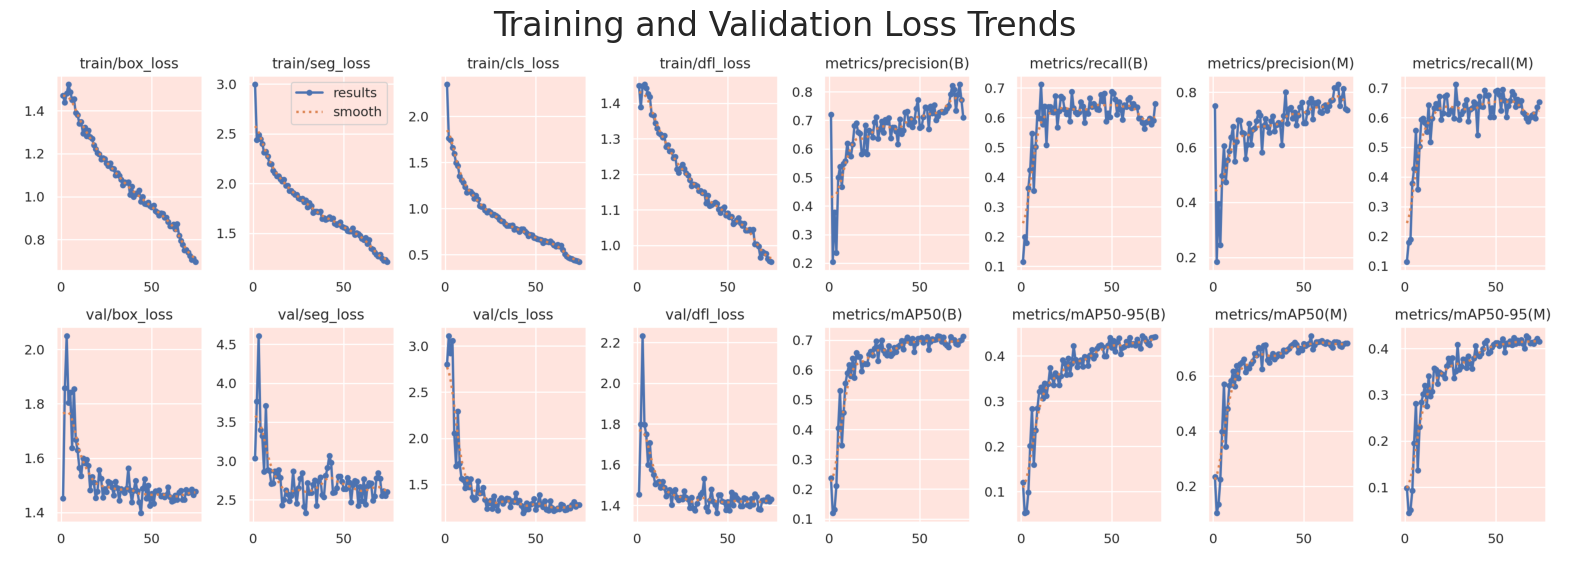

In [13]:

# Create the full file path by joining the directory path with the filename

results_file_path = os.path.join(post_training_files_path, 'results.png')

# Read the image using cv2
image = cv2.imread(results_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(image)
plt.title('Training and Validation Loss Trends', fontsize=24)
plt.axis('off')
plt.show()

In [14]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title, ylim_range=[0,2]):
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='blue', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='#ed2f00', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(ylim_range)
    plt.legend()
    plt.show()

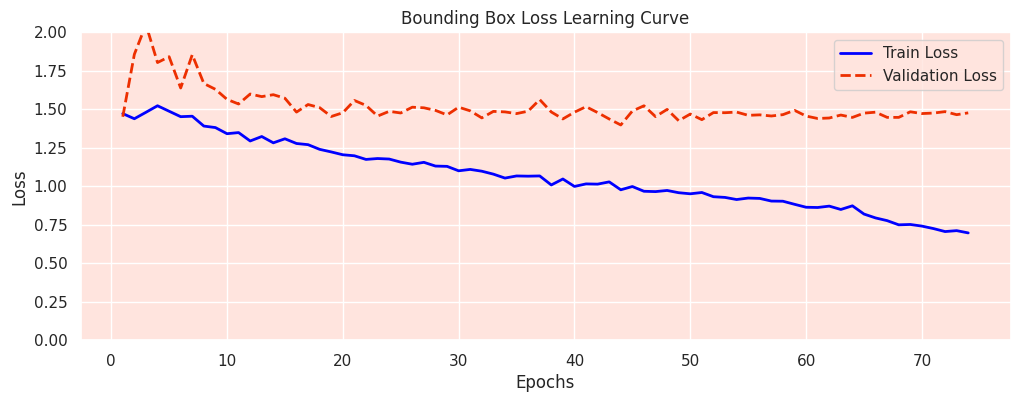

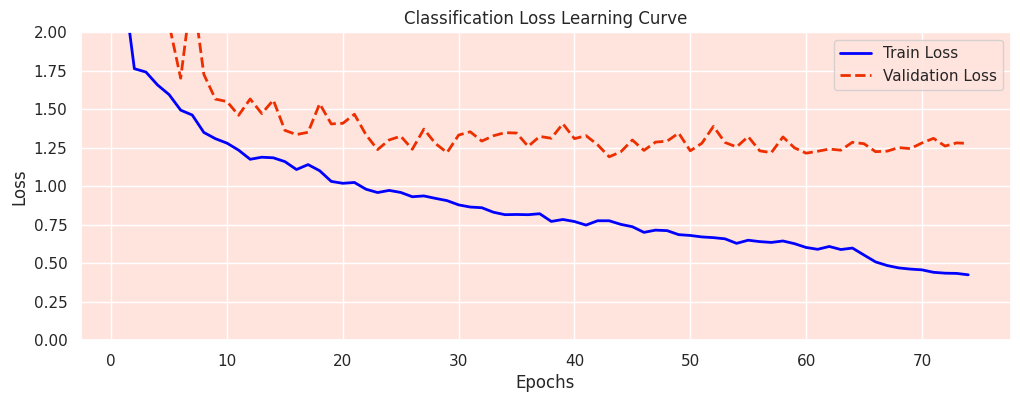

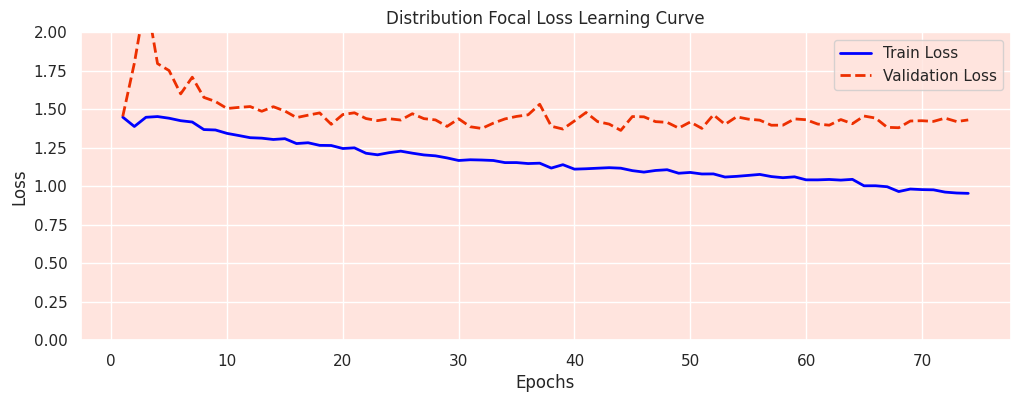

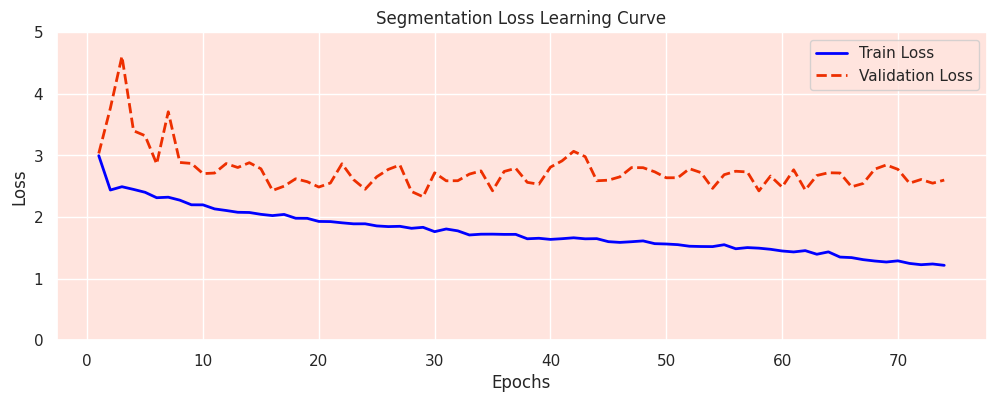

In [15]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Bounding Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')
plot_learning_curve(df, 'train/seg_loss', 'val/seg_loss', 'Segmentation Loss Learning Curve', ylim_range=[0,5])

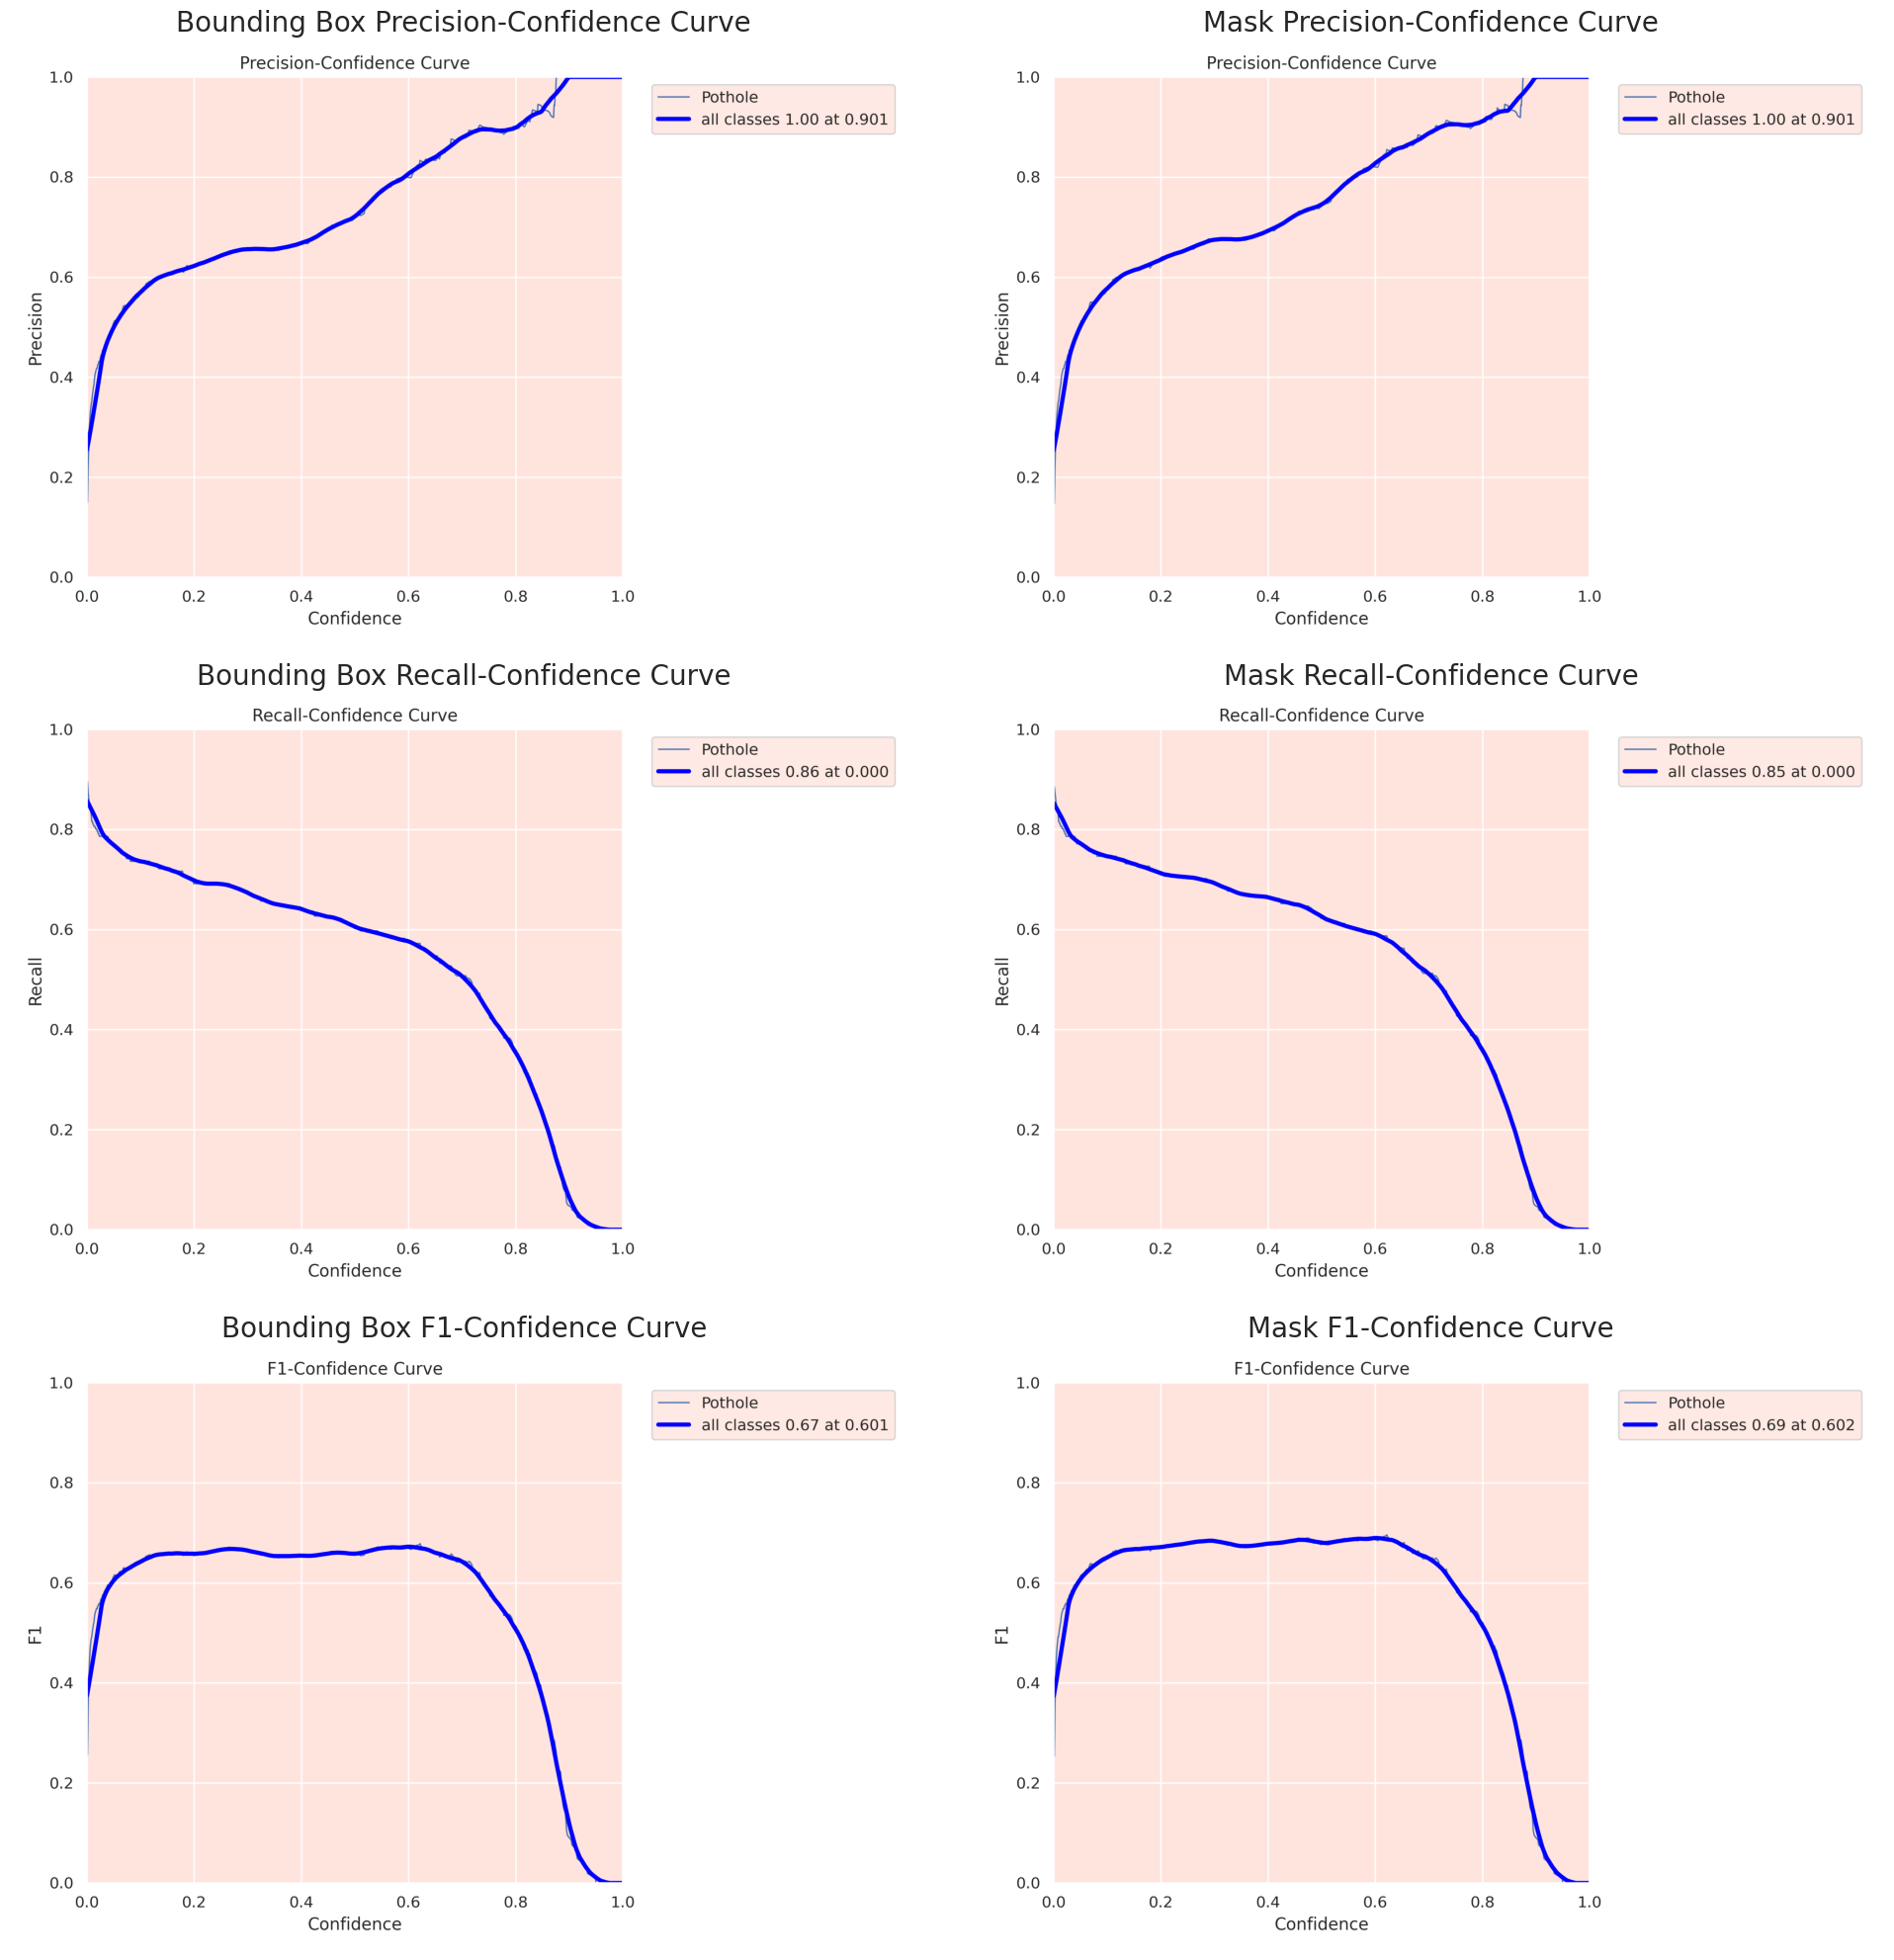

In [16]:
# Define the filenames for 'Box' and 'Mask' metrics along with their titles
box_files_titles = {
    'BoxP_curve.png': 'Bounding Box Precision-Confidence Curve',
    'BoxR_curve.png': 'Bounding Box Recall-Confidence Curve',
    'BoxF1_curve.png': 'Bounding Box F1-Confidence Curve'
}
mask_files_titles = {
    'MaskP_curve.png': 'Mask Precision-Confidence Curve',
    'MaskR_curve.png': 'Mask Recall-Confidence Curve',
    'MaskF1_curve.png': 'Mask F1-Confidence Curve'
}

# Create a 3x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# Function to read and convert image for plotting
def read_and_convert_image(file_path):
    # Read the image using cv2
    image = cv2.imread(file_path)
    # Convert from BGR to RGB
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot 'Box' images in the first column with meaningful titles
for i, (filename, title) in enumerate(box_files_titles.items()):
    img_path = os.path.join(post_training_files_path, filename)
    img = read_and_convert_image(img_path)
    axs[i, 0].imshow(img)
    axs[i, 0].set_title(title, fontsize=20)
    axs[i, 0].axis('off')

# Plot 'Mask' images in the second column with meaningful titles
for i, (filename, title) in enumerate(mask_files_titles.items()):
    img_path = os.path.join(post_training_files_path, filename)
    img = read_and_convert_image(img_path)
    axs[i, 1].imshow(img)
    axs[i, 1].set_title(title, fontsize=20)
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

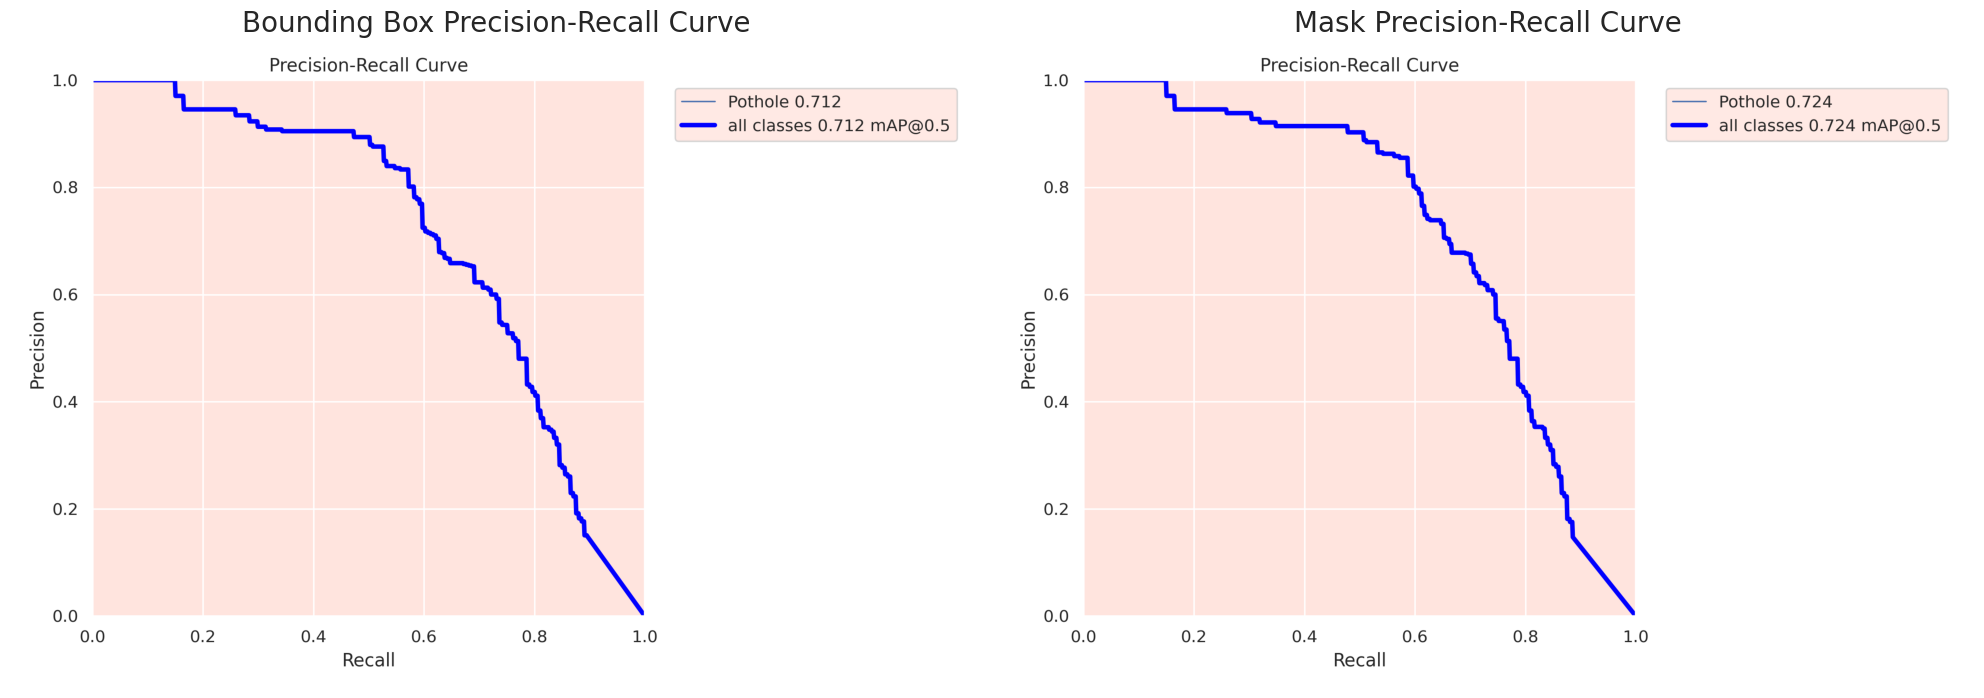

In [17]:
# Define the filenames for 'Box' and 'Mask' metrics along with their titles
pr_files_titles = {
    'BoxPR_curve.png': 'Bounding Box Precision-Recall Curve',
    'MaskPR_curve.png': 'Mask Precision-Recall Curve'
}

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot 'Box' and 'Mask' images in the subplot with meaningful titles
for i, (filename, title) in enumerate(pr_files_titles.items()):
    img_path = os.path.join(post_training_files_path, filename)
    img = read_and_convert_image(img_path)
    axs[i].imshow(img)
    axs[i].set_title(title, fontsize=20)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

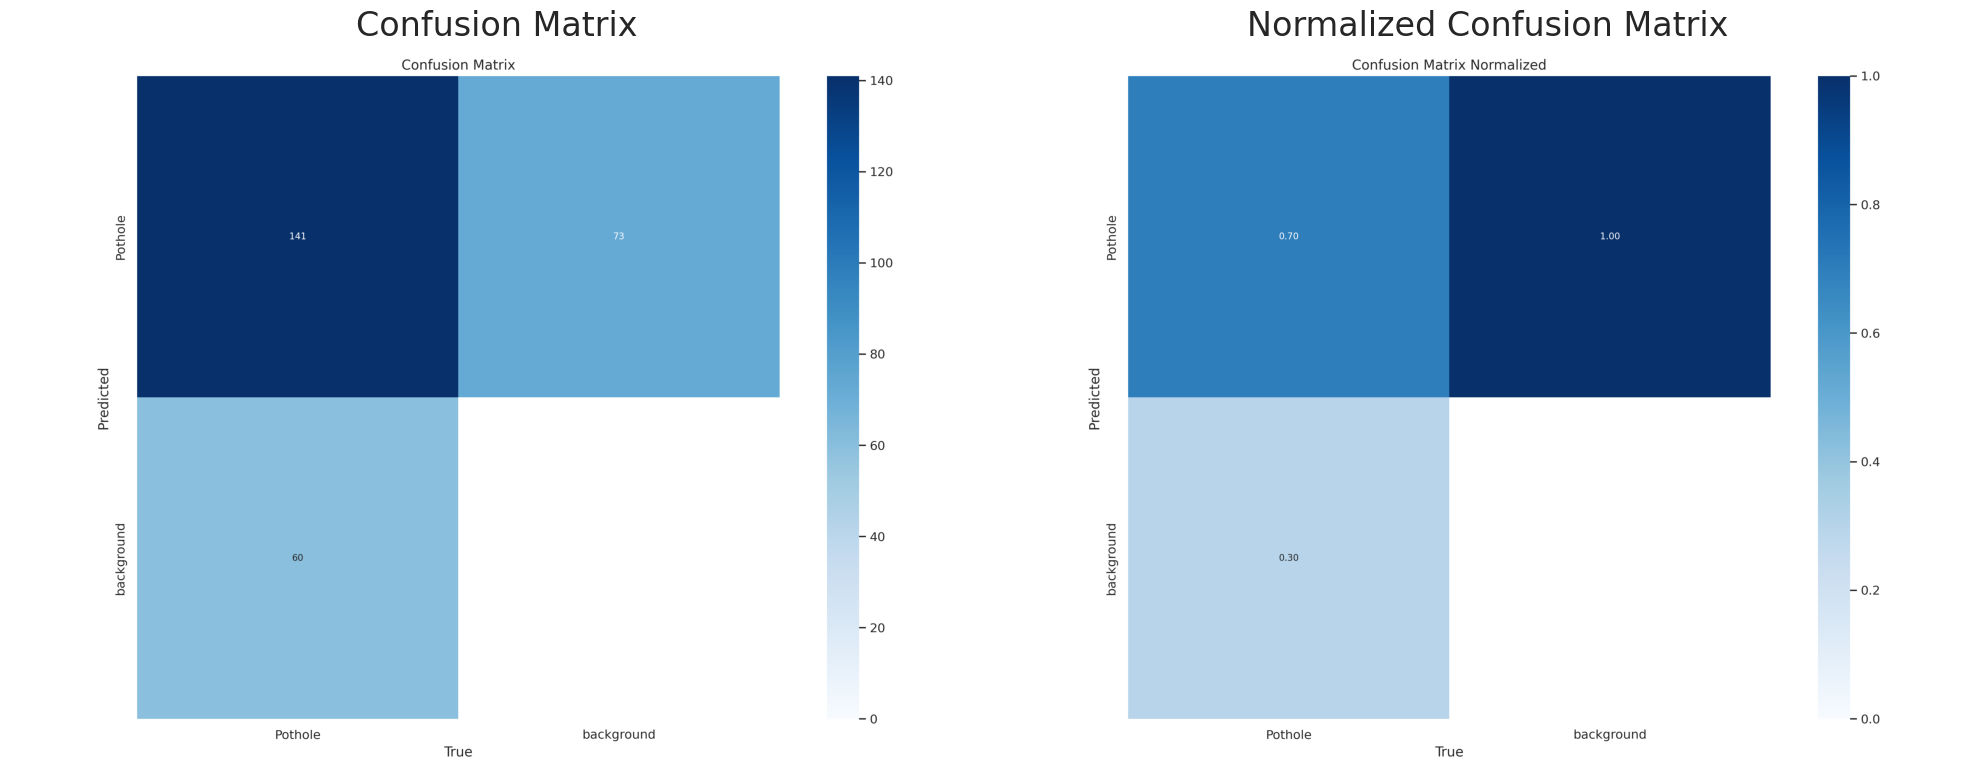

In [18]:
# Construct the path to the confusion matrix images
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix.png')
confusion_matrix_normalized_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Read and convert both images
cm_img = read_and_convert_image(confusion_matrix_path)
cm_norm_img = read_and_convert_image(confusion_matrix_normalized_path)

# Display the images
axs[0].imshow(cm_img)
axs[0].set_title('Confusion Matrix', fontsize=24)
axs[0].axis('off')

axs[1].imshow(cm_norm_img)
axs[1].set_title('Normalized Confusion Matrix', fontsize=24)
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [19]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/drive/MyDrive/archive/Pothole_Segmentation_YOLOv8/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


                   all         60        201       0.79      0.582      0.712      0.444      0.811      0.597      0.724      0.427
Speed: 0.4ms preprocess, 22.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/segment/val


In [20]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

,Metric Value
metrics/precision(B),0.790
metrics/recall(B),0.582
metrics/mAP50(B),0.712
metrics/mAP50-95(B),0.444
metrics/precision(M),0.811
metrics/recall(M),0.597
metrics/mAP50(M),0.724
metrics/mAP50-95(M),0.427
fitness,0.927


from matplotlib import pyplot as plt
_df_0['Metric Value'].plot(kind='hist', bins=20, title='Metric Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Metric Value'].plot(kind='line', figsize=(8, 4), title='Metric Value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [21]:
# Define the path to the validation images
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# List all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Select 9 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

# Initialize the subplot
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640)
    annotated_image = results[0].plot()
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [22]:
import torch

# Assuming `model` is your PyTorch model
filename = 'pothole_segmentation.pth'
torch.save(model.state_dict(), filename)


In [23]:
from ultralytics import YOLO

# Load the YOLOv8 segmentation model
model = YOLO('/content/runs/segment/train/weights/best.pt')
model.load_state_dict(torch.load('pothole_segmentation.pth'))

<All keys matched successfully>

In [24]:
model.save('pothole_segmentation.pt')


In [25]:
model = YOLO('pothole_segmentation.pt')


Enter the path to the image: /content/drive/MyDrive/pothole_image.jpg

image 1/1 /content/drive/MyDrive/pothole_image.jpg: 448x640 1 Pothole, 68.4ms
Speed: 2.2ms preprocess, 68.4ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


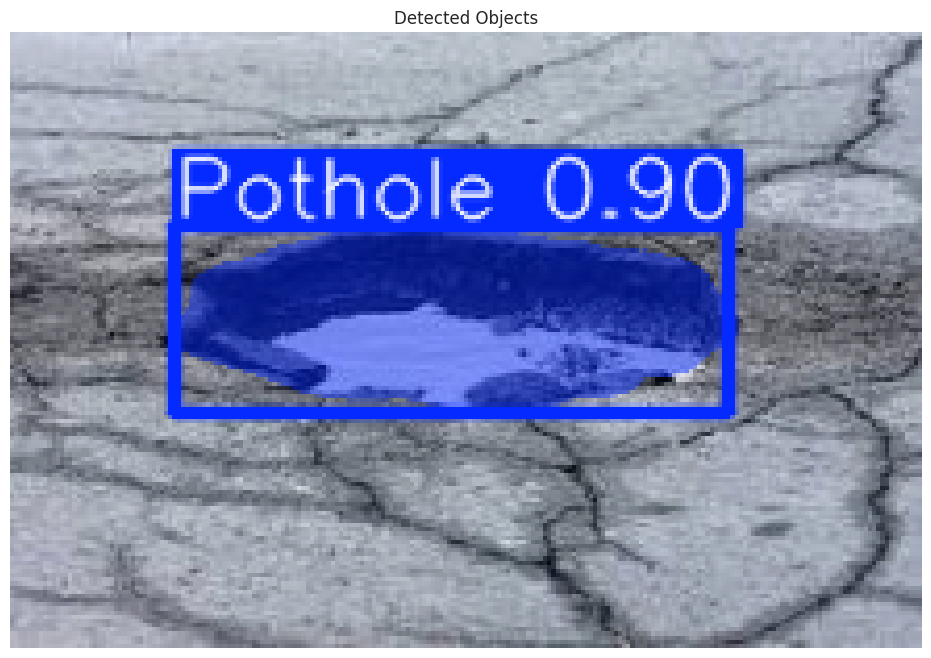

In [26]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from pathlib import Path


def detect_objects(image_path, model_path):
    """
    Detect objects in the input image using a YOLOv8 model.

    Args:
        image_path (str): Path to the input image.
        model_path (str): Path to the pre-trained YOLOv8 model.

    Returns:
        Annotated image with detected objects.
    """
    # Load the model
    model = YOLO(model_path)

    # Run detection on the image
    results = model.predict(source=image_path, conf=0.5)

    # Convert detections into an annotated image
    annotated_image = results[0].plot()

    return annotated_image


# Input from user
user_image_path = input("Enter the path to the image: ").strip()
image_path = Path(user_image_path)

if not image_path.exists():
    print("Image file not found. Please provide a valid path.")
else:
    # Perform object detection
    output_image = detect_objects(str(image_path), '/content/pothole_segmentation.pt')

    # Display the image using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected Objects')
    plt.show()
